In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
from RRNN import RRNN
import matplotlib.pyplot as plt

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


### Différences dans les courbes d'accord

Par un ajustement de la distribution de Von Mises aux taux de décharge de la population excitatrice, nous tentons maintenant de montrer, de façon plus quantitative, l'effet de chacun des deux types de connectivité.

Nous simulons donc le ring feed-forward et le ring récurrent avec différentes entrées, des distributions d'orientation ayant différentes largeurs de bande. Pour chacun des deux types de ring, nous mesurons le taux de décharge moyen de la population excitatrice et nous ajustons ensuite ces taux de décharge par des distributions de Von Mises.

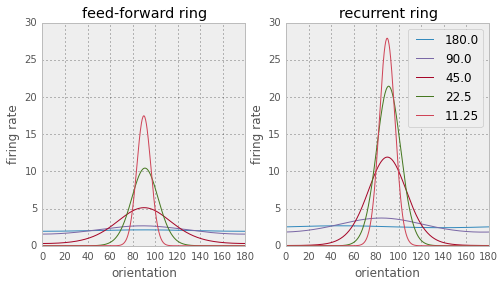

In [2]:
time = 100
bw_values = 180*np.logspace(0, -4, 5, base=2)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i in range(2):#, w in enumerate([0., .32]):
    for bw_value in bw_values:
        if i==1:
            net = RRNN(time=time, c=1, b_input=bw_value)
        else:
            net = RRNN(time=time, ff_ring=True, b_input=bw_value)
        df, spikesE, spikesI = net.model()
        theta, fr, result = net.fit_vonMises(spikesE)
        #print(result.best_fit.mean())
        axs[i].plot(theta*180/np.pi, result.best_fit, label=str(bw_value))

    axs[i].set_xlabel('orientation')
    axs[i].set_ylabel('firing rate')
    axs[i].axis('tight')
    axs[i].set_ylim([0, 30])
axs[0].set_title('feed-forward ring')
axs[1].set_title('recurrent ring')

plt.legend(loc='best')
plt.show()

fig.savefig('../figs/ring_feed-forward_vs_recurrent.png', dpi = 600)